# Self Organized Maps Unsupervised

Burada yapacağımız işlem banka formu doldurup bankaya kredi kartı için kaydolmuş müşterilerin bilgilerini kullanarak-kümeleyerek hangi müşterilerin dolandırıcı-borcunu ödemeyen olabileceğini tespit etmek.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the Dataset

In [3]:
dataset = pd.read_csv("data/SOM/Credit_Card_Applications.csv")
X = dataset.iloc[:, :-1].values # bütün attributeler-sütunlar
y = dataset.iloc[:, -1].values # başvuru onaylandı mı? 1:yes 0:no
print(X[0], Y[0])
# y burada sınıflar ama unsupervised yapcağımız için işlemlerde X'i kullanacağız

[1.5776156e+07 1.0000000e+00 2.2080000e+01 1.1460000e+01 2.0000000e+00
 4.0000000e+00 4.0000000e+00 1.5850000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 1.0000000e+00 2.0000000e+00 1.0000000e+02 1.2130000e+03] 0


In [4]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1)) # skala 0-1 arasında olacak
X = sc.fit_transform(X)
print(X[0])

[0.84268147 1.         0.12526316 0.40928571 0.5        0.23076923
 0.375      0.05561404 0.         0.         0.         1.
 0.5        0.05       0.01212   ]


### Training the SOM

data/SOM/minisom.py adresini temsil ediyor.<br>
minisomu birisi yazıp yayınlamış, lisansı kodu heryerde kullanmaya izin veriyor.<br>
MiniSOM(x, y, input_len, sigma = 1.0, learning_rate = 0.5)<br>
x = kaç satırdan oluşacak (map oluşturuyoruz grid şeklinde görsel halini görmüştük)
y = kaç satırdan oluşacak
input_len = kaç tane features var, yani indikatör-sütun<br>
sigma = radiusun oranını belirliyor<br>
learning_rate = her iterasyonda ağırlıkların ne kadar güncelleneceğini belirler. Bu yüksek oldukça SOM daha hızlı çalışır, düşük oldukça yavaşlar.<br>

In [45]:
from data.SOM.minisom import MiniSom
# build som
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)

In [46]:
# init weights
som.random_weights_init(X)
som.train_random(X, num_iteration = 100)

### Visualising the Results

Sonuçları göstermede BMU nodeları renklendirilerek gösterilcek ve onlara en yakın nodelar benzer renge sahipken radiusun kenarlarına doğru gidildikçe renkleri beyaza yaklaşacak.

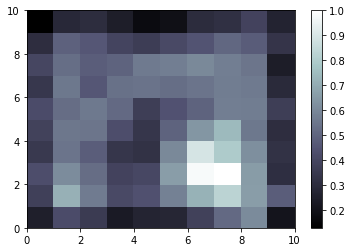

In [47]:
from pylab import bone, pcolor, colorbar, plot, show
bone() # pencereyi oluşturuyoruz
pcolor(som.distance_map().T) # bmu nodeları ile etraflarındakilerin değerlerini Transpoz ederek ekliyor
colorbar() # sağdaki nodelar arası mesafelerin renk skalasını verir
# beyaz değerler onaylanan, dolandırılma ihtimali yüksek olanları gösteriyor

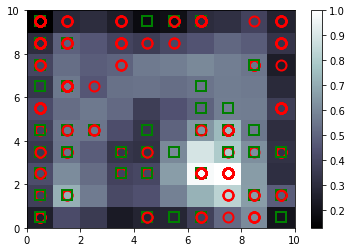

In [48]:
bone()
pcolor(som.distance_map().T)
colorbar()
# kırmızı 'r' renkli yuvarlaklar 'o' onaylanmayan üyelikleri gösteriyor
# yeşil 'g' renkli kareler 's' onay alanlar
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x) # bu verinin bağlı olduğu bmu, yani winner nodu buluyoruz
    # plot(X, Y, marker_to_draw, ...)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], 
         markeredgecolor = colors[y[i]], markerfacecolor = 'None', markersize = 10, markeredgewidth = 2) 
    # x,y kordinatları, ancak tam karenin ortası merkez olarak alınsın diye +0.5 yaptık
    # kare mi yuvarlakmı koyulacağı da asıl sınıfına göre belirlenecek
show()

Kırmızı yuvarlaklı nodelar onay almamışlar, yeşil kareli nodelar ise almışlar demektir. Beyazlara bakarsan dolandırma ihtimalleri yüksektir. İçlerinde hem onay almış hem de onay almamış müşteri bilgileri mevcuttur. Yani bazı müşteriler dolandırma ihtimalleri yüksek olarak onaylanmış ama bazıları onaylanmamış yok bunlar dolandırmaz denilmiş banka tarafından ama aslında onların da dolandırma-borçlarını ödememe ihtimalleri yüksekmiş ki burada işaretlemeye sebep olmuşlar.

<b>Dolandırma ihtimalleri olanları bulalım</b><br>
win_map bir dictionary döndürür, döndürdüğü dictionaryde keyler winner nodeların kordinatlarını belirtir, valueler ise bu nodelara bağlı olan verileri içerir.

In [24]:
mappings = som.win_map(X)
print(mappings.keys())

dict_keys([(5, 0), (2, 9), (9, 6), (8, 7), (3, 4), (0, 1), (0, 7), (1, 7), (5, 5), (6, 9), (5, 3), (6, 7), (7, 0), (0, 6), (8, 9), (1, 1), (9, 4), (0, 5), (7, 9), (7, 3), (3, 0), (2, 3), (9, 2), (0, 4), (6, 1), (0, 8), (4, 1), (4, 3), (3, 6), (9, 1), (2, 0), (2, 4), (0, 2), (1, 3), (1, 0), (4, 2), (4, 7), (0, 9), (6, 0), (3, 5), (9, 3), (4, 5), (8, 4), (4, 6), (8, 5), (5, 4), (7, 6), (3, 7), (0, 3), (3, 9), (1, 5), (5, 8), (1, 8), (7, 1), (4, 0), (8, 1), (8, 2), (2, 7), (6, 8), (6, 3), (9, 5), (7, 5), (2, 5), (1, 9), (2, 8), (6, 6), (8, 3), (6, 2)])


In [51]:
# mape baktığımızda 7,6 ve 7,7 kordinatlarında dolandırıcı var, ona yakınların listesini alıyoruz
frauds = mappings[(7, 6)] + mappings[(7, 7)]
frauds = sc.inverse_transform(frauds)
print(frauds[:3])

[[1.5773421e+07 0.0000000e+00 2.0750000e+01 1.0335000e+01 2.0000000e+00
  1.3000000e+01 8.0000000e+00 3.3500000e-01 1.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0000000e+00 2.0000000e+00 8.0000000e+01 5.1000000e+01]
 [1.5682686e+07 0.0000000e+00 3.1250000e+01 3.7500000e+00 2.0000000e+00
  1.3000000e+01 8.0000000e+00 6.2500000e-01 1.0000000e+00 1.0000000e+00
  9.0000000e+00 1.0000000e+00 2.0000000e+00 1.8100000e+02 1.0000000e+00]
 [1.5707602e+07 0.0000000e+00 2.2830000e+01 2.2900000e+00 2.0000000e+00
  1.1000000e+01 8.0000000e+00 2.2900000e+00 1.0000000e+00 1.0000000e+00
  7.0000000e+00 1.0000000e+00 2.0000000e+00 1.4000000e+02 2.3850000e+03]]
